In [12]:
import matplotlib.pyplot as plt

import IPython

import tensorflow as tf

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [13]:
!curl -L -O https://github.com/hromi/SMILEsmileD/archive/master.zip
!unzip -q master.zip
!mv SMILEsmileD-master/SMILEs .
!rm master.zip
!rm -r SMILEsmileD-master

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   133  100   133    0     0    575      0 --:--:-- --:--:-- --:--:--   575
100 39.6M  100 39.6M    0     0  4868k      0  0:00:08  0:00:08 --:--:-- 6952k


In [14]:
from os import walk
from os.path import splitext

def list_files(path, extensions=None):
    for dirpath, dirnames, filenames in walk(path):
        for filename in filenames:
            root, ext = splitext(filename)
            if extensions is None or ext in extensions:
                yield root + ext

show sizes of positive and negative examples

In [15]:
negative_paths = list(list_files('SMILEs/negatives/negatives7/', [".jpg"]))
print ('loaded', len(negative_paths), 'negative examples')

positive_paths = list(list_files('SMILEs/positives/positives7/', [".jpg"]))
print ('loaded', len(positive_paths), 'positive examples')


loaded 9475 negative examples
loaded 3690 positive examples


Load images from directory

In [16]:
img_height = 64
img_width = 64
batch_size = 32

data_dir = "SMILEs"

In [17]:
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width)
)

Found 13165 files belonging to 2 classes.


In [18]:
class_names = ds.class_names
print(class_names)

['negatives', 'positives']


Some examples from Dataset

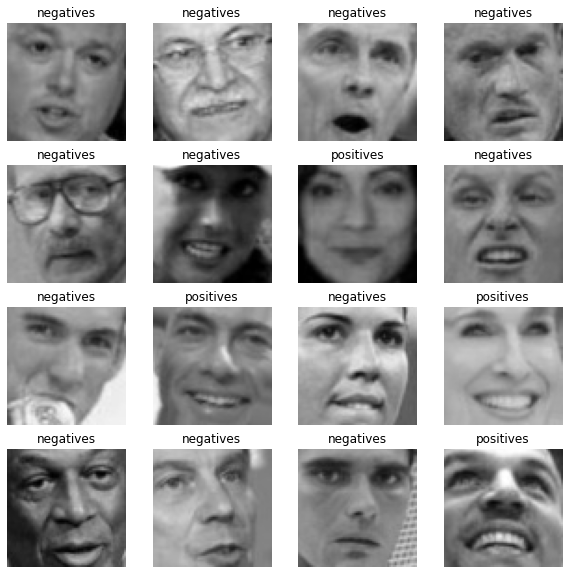

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")